# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Brain Stroke Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://www.sinakhan.com/media/photos/BrainAneurysm.jpg" style='width: 350px; height: 350px;'>
</p>

<p style="text-align:justify; ">
<B>Brain Stroke</B> happens when there is a blockage in the blood circulation in the brain or when a blood vessel in the brain breaks and leaks. The burst or blockage prevents blood and oxygen reaching the brain tissue. Without oxygen the tissues and cells in the brain are damaged and die in no time leading to many symptoms.<br>
<br>    
Once brain cells die, they generally do not regenerate and devastating damage may occur, sometimes resulting in physical, cognitive and mental disabilities. It is crucial that proper blood flow and oxygen be restored to the brain as soon as possible.<br>
<br>    
Worldwide, brain stroke is the second leading cause of death and third leading cause of disability. In some cases, the warning signs of a stroke can be obvious but what’s going on inside the body is incredibly complex. 80% of strokes are preventable. But once you’ve had a stroke, the chances you have another one are greater. 
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |No  | Contents  |
|:---| :---     |:---| :----     |:---| :----     |
|1   | [<font color="#432C0A"> Importing Libraries</font>](#1)             |8   | [<font color="#432C0A"> Stroke Patient's Gender</font>](#8)                |14   | [<font color="#432C0A"> Stroke Patient's Average Glucose Level</font>](#14) |
|2   | [<font color="#432C0A"> About Dataset</font>](#2)                   |9   | [<font color="#432C0A"> Stroke Patient's Smoking Status</font>](#9)        |15   | [<font color="#432C0A"> Stroke Patient's Occupation</font>](#15) |
|3   | [<font color="#1c1c1c"> Basic Exploration</font>](#3)               |10  | [<font color="#1c1c1c"> Stroke Patient's Marital Status</font>](#10)       |16   | [<font color="#432C0A"> Stroke Patient's Residence</font>](#16)  |     
|4   | [<font color="#1c1c1c"> Dataset Summary</font>](#4)                 |11  | [<font color="#1c1c1c"> Stroke Patient's BMI</font>](#11)                  |17   | [<font color="#432C0A"> Correlation Map</font>](#17)  |                
|5   | [<font color="#1c1c1c"> Data Preprocessing</font>](#5)               |12  | [<font color="#1c1c1c"> Stroke Patient's Heart Disease</font>](#12)        |18   | [<font color="#432C0A"> Model Creation & Performance Evaluation</font>](#18)  |
|6   | [<font color="#1c1c1c"> Custom Palette For Visualization</font>](#6) |13  | [<font color="#1c1c1c"> Stroke Patient's Hypertension Status</font>](#13)  |19   | [<font color="#432C0A"> Thank You</font>](#19)  |         
|7   | [<font color="#1c1c1c"> Stroke Patient's Age</font>](#7) |

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **gender:** Gender of the patient (Male, Female, Other)
* **age:** Age of the patient
* **hypertension:** **0** if the patient doesn't have hypertension, **1** if the patient has hypertension
* **heart_disease:** **0** if the patient doesn't have any heart diseases, **1** if the patient has a heart disease
* **ever_married:** **Yes** if the patient is married, **No** if the patient is not married 
* **avg_glucose_level:** Average glucose level in blood of the patient
* **stroke:** **1** if the patient had a stroke or **0** if not


In [123]:
data = pd.read_csv("./dataset/healthcare-dataset-stroke-data.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [124]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

Shape Of The Dataset : (5110, 12)

Glimpse Of The Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


In [125]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [126]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

Summary Of The Dataset :


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [127]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [128]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 5110 entries in this dataset.
After removing duplicate entries there are 5110 entries in this dataset.


In [129]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

Null values of the Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,201,0,0


**Insights:**

* There are missing values in **bmi**. We will drop the rows that have missing bmi values.
* There is no duplicate values in this dataset.
* We will encode the categorical features into numerical form later.

<a id="5"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [130]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

After dropping null values, the shape of the Dataset is (4909, 12)
After dropping null values, null values of the Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
data["age"] = data["age"].astype("int")
data = data[data["gender"] != "Other"]
data["hypertension"].replace({0:"No", 1:"Yes"}, inplace = True)
data["heart_disease"].replace({0:"No", 1:"Yes"}, inplace = True)
data["stroke"].replace({0:"No", 1:"Yes"}, inplace = True)
data["ever_married"].replace({"No":"Unmarried", "Yes":"Married"}, inplace = True)
data["work_type"].replace({"Self-employed":"Self Employed","children":"Children", "Govt_job":"Government Job", "Private":"Private Job", "Never_worked":"Unemployed"}, inplace = True)
data["smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)
data.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type","Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI","smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)
data = data[["Age","Gender","Marital Status","BMI","Occupation Type","Residence Type","Smoking Status","Hypertension","Heart Disease","Average Glucose Level","Stroke"]]

print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

After preprocessing, let's have a glimpse of the final dataset :


,Age,Gender,Marital Status,BMI,Occupation Type,Residence Type,Smoking Status,Hypertension,Heart Disease,Average Glucose Level,Stroke
0,67,Male,Married,36.600000,Private Job,Urban,Formerly Smoked,No,Yes,228.690000,Yes
2,80,Male,Married,32.500000,Private Job,Rural,Never Smoked,No,Yes,105.920000,Yes
3,49,Female,Married,34.400000,Private Job,Urban,Smokes,No,No,171.230000,Yes
4,79,Female,Married,24.000000,Self Employed,Rural,Never Smoked,Yes,No,174.120000,Yes
5,81,Male,Married,29.000000,Private Job,Urban,Formerly Smoked,No,No,186.210000,Yes


In [132]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

After preprocessing, let's have a look on the summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
Age,4908.000000,42.857579,22.577004,0.000000,25.000000,44.000000,60.000000,82.000000
BMI,4908.000000,28.894560,7.854320,10.300000,23.500000,28.100000,33.100000,97.600000
Average Glucose Level,4908.000000,105.297402,44.425550,55.120000,77.067500,91.680000,113.495000,271.740000


In [133]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,unique,top,freq
Gender,4908,2,Female,2897
Marital Status,4908,2,Married,3204
Occupation Type,4908,5,Private Job,2810
Residence Type,4908,2,Urban,2490
Smoking Status,4908,4,Never Smoked,1852
Hypertension,4908,2,No,4457
Heart Disease,4908,2,No,4665
Stroke,4908,2,No,4699


<a id="6"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [134]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Age</p>

Let's have a look on the distribution of stroke patient's age :


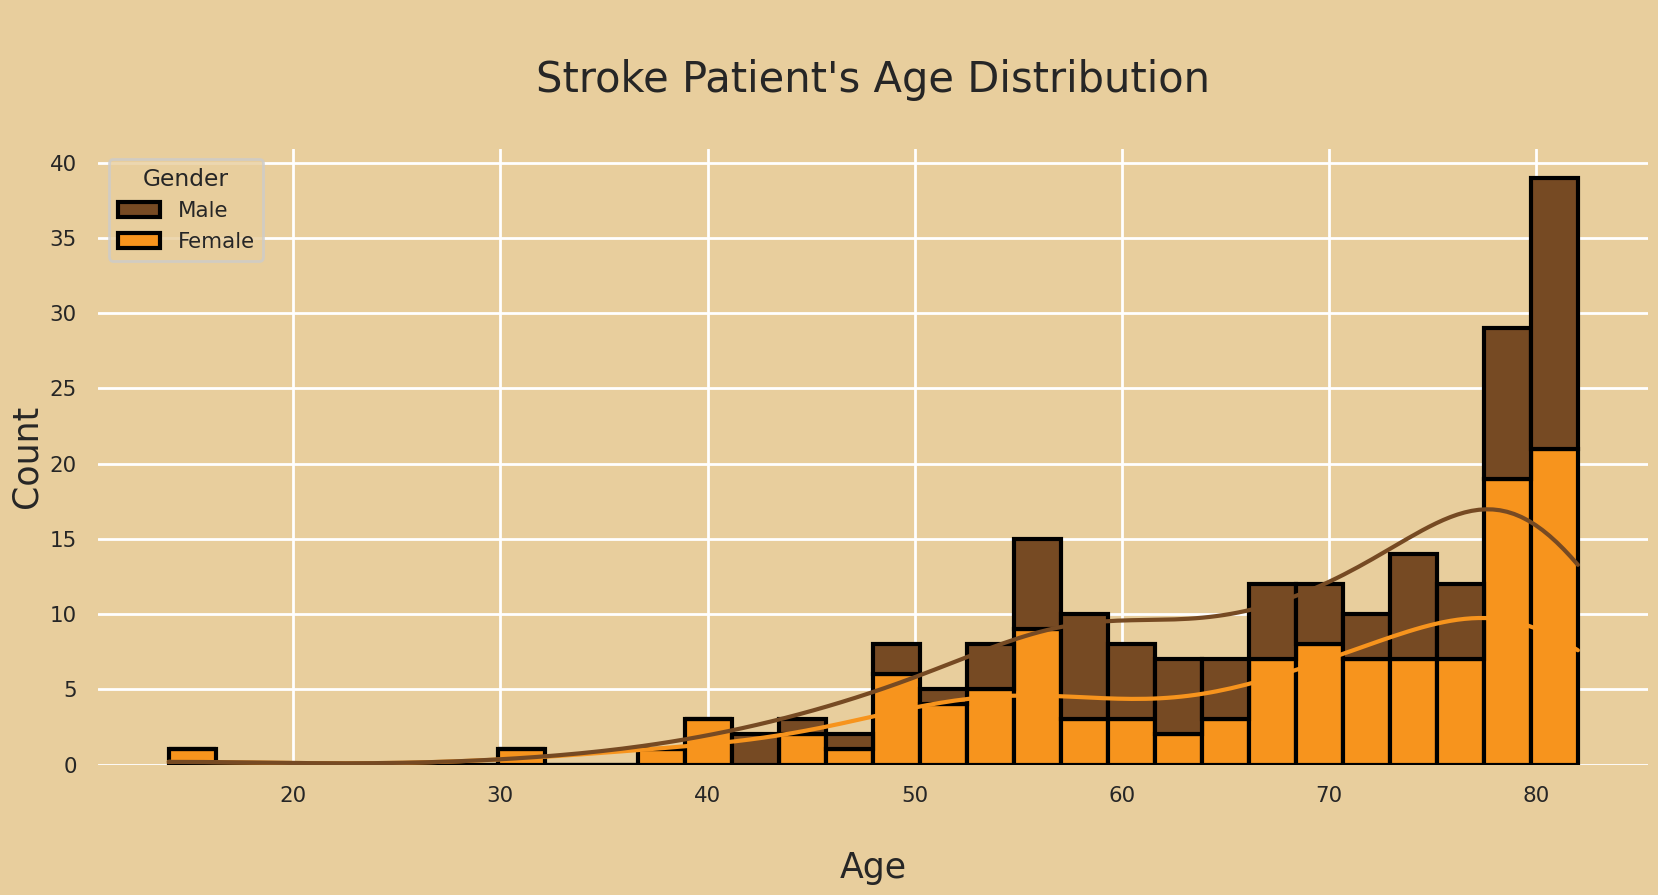

In [135]:
print(f"Let's have a look on the distribution of stroke patient's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="Age",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see the stroke patient's age distribution is left skewed. Most of the patients  fall in between **60 years** to **82 years**.
* Also there are some young and children female stroke patients too.

Let's have a look on the distribution of genderwise stroke patient's age :


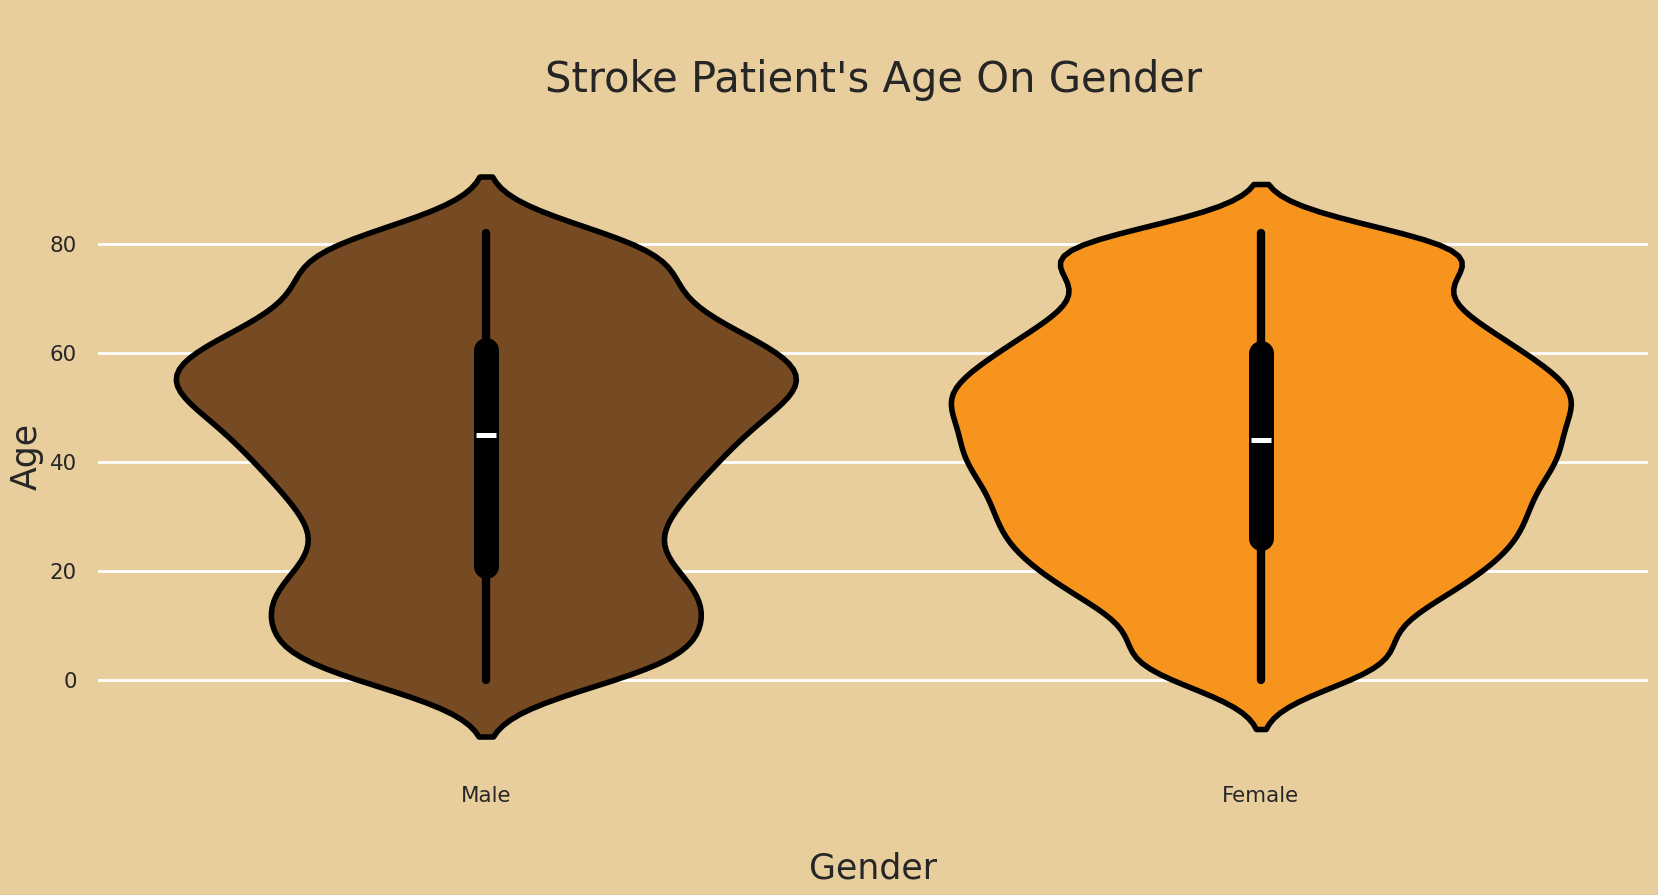

In [136]:
print("Let's have a look on the distribution of genderwise stroke patient's age :")
plt.subplots(figsize=(20, 8))

p=sns.violinplot(data=data[data["Stroke"] == "Yes"],x=data["Gender"],y=data["Age"],order=data["Gender"].value_counts(ascending=True).index,palette=palette[0:2],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nStroke Patient's Age On Gender\n",fontsize=30)
p.axes.set_xlabel("\nGender",fontsize=25)
p.axes.set_ylabel("Age",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the **Male** patients fall in between **55 years** to **82 years**
* Most of the **Female** patients fall in between **48 years** to **82 years**


<a id="8"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Gender</p>

Let's have a look on the ratio of stroke patient's gender :


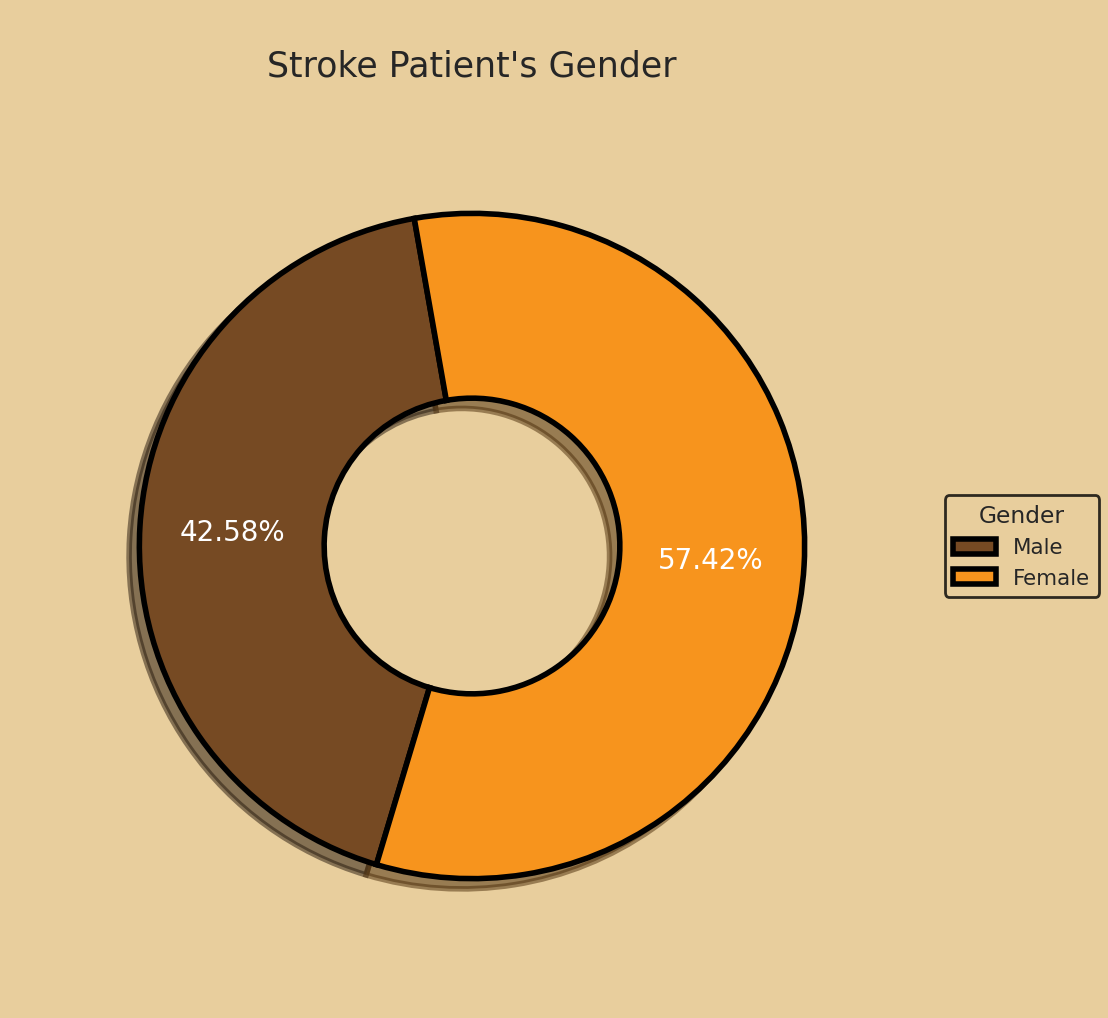

In [137]:
print(f"Let's have a look on the ratio of stroke patient's gender :")
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[0],
                                    data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 100)

plt.legend(wedges, labels, title="Gender",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Gender",fontsize=25)
plt.show()

Let's have a look on the stroke patient's gender :


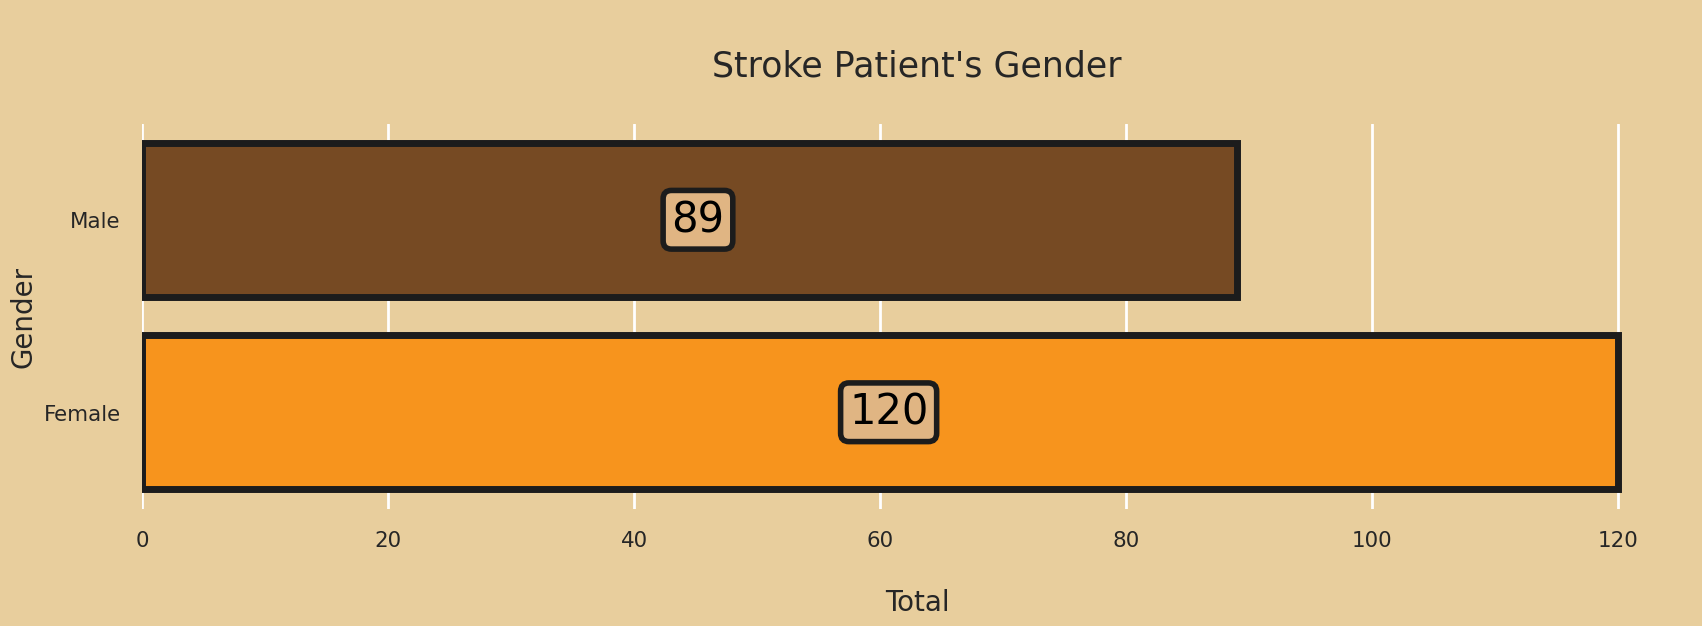

In [138]:
print("Let's have a look on the stroke patient's gender :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Gender"],order=data[data["Stroke"]=="Yes"]["Gender"].value_counts(ascending=True).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Gender\n",fontsize=25)
p.axes.set_ylabel("Gender",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients are **Female** with a ratio of **57.42%** followed by **Male** with a ratio of **42.58%**


<a id="9"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Smoking Status</p>

Let's have a look on the ratio of stroke patient's smoking status :


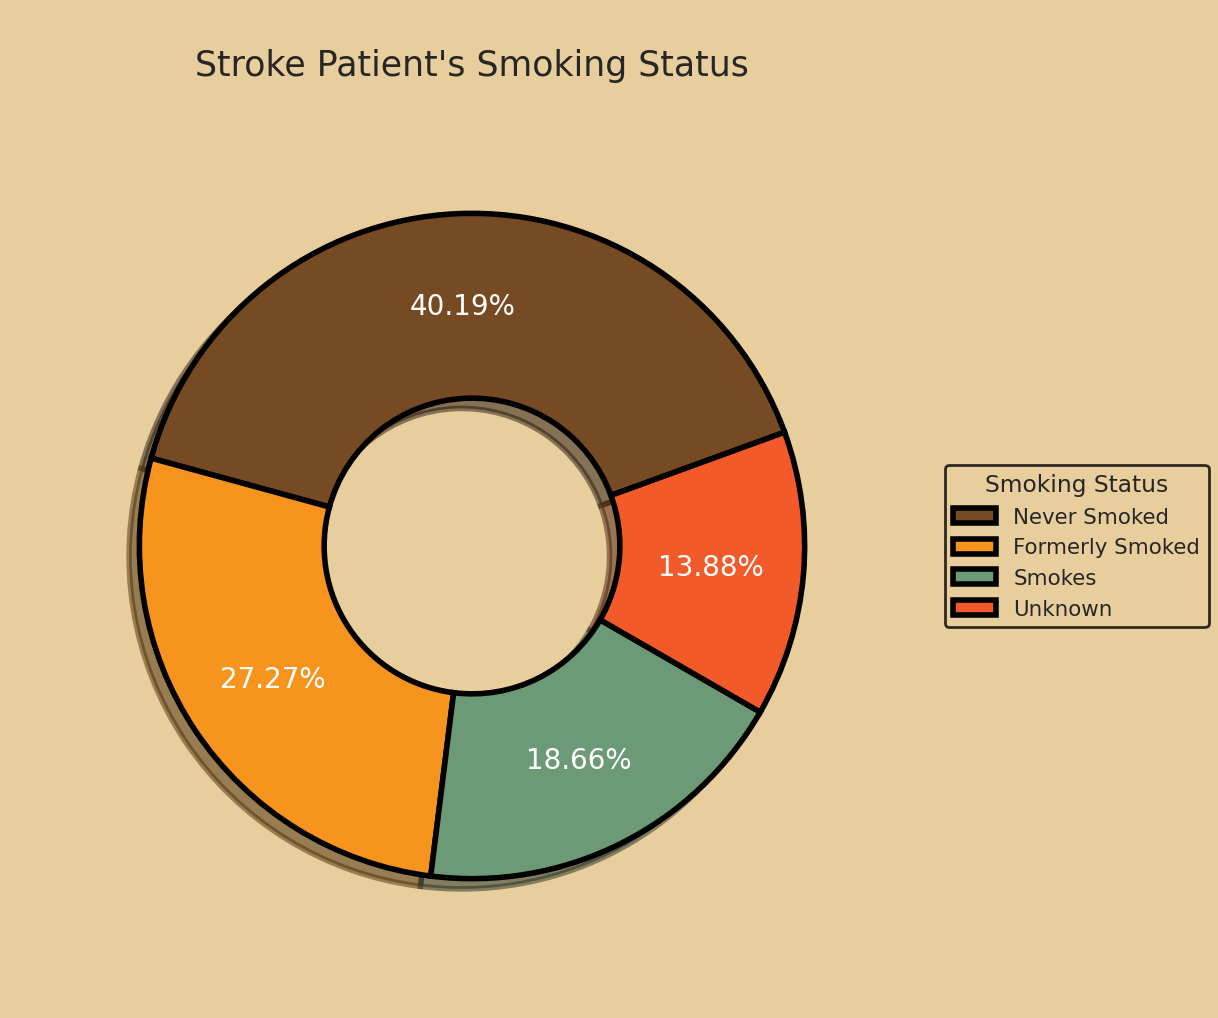

In [139]:
print(f"Let's have a look on the ratio of stroke patient's smoking status :")
plt.subplots(figsize=(12, 12))

labels = "Never Smoked","Formerly Smoked","Smokes","Unknown"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[1],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[2],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:4], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Smoking Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Smoking Status",fontsize=25)
plt.show()

Let's have a look on the stroke patient's smoking status :


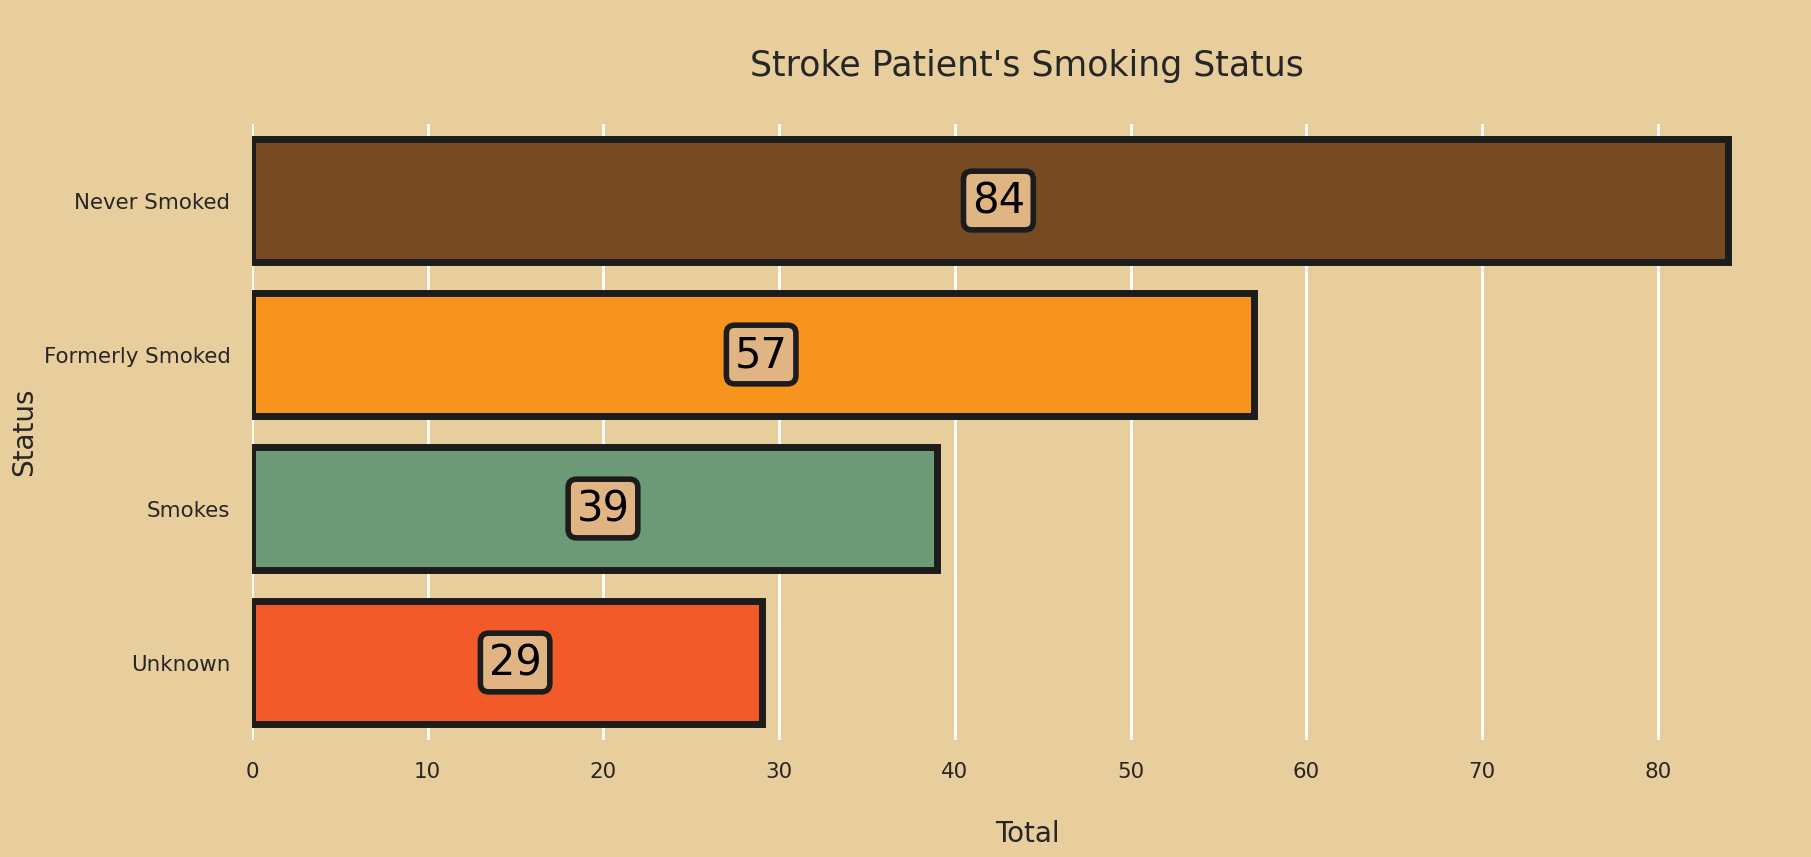

In [140]:
print("Let's have a look on the stroke patient's smoking status :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Smoking Status"],order=data[data["Stroke"]=="Yes"]["Smoking Status"].value_counts(ascending=False).index,palette=palette[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Smoking Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients have **Never Smoked** with a ratio of **40.19%**
* Some of the stroke patients have **Smoked Previuosly** with a ratio of **27.27%**
* For some patients, the smoking status is unknown 

<a id="10"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Marital Status</p>

Let's have a look on the ratio of stroke patient's marital status :


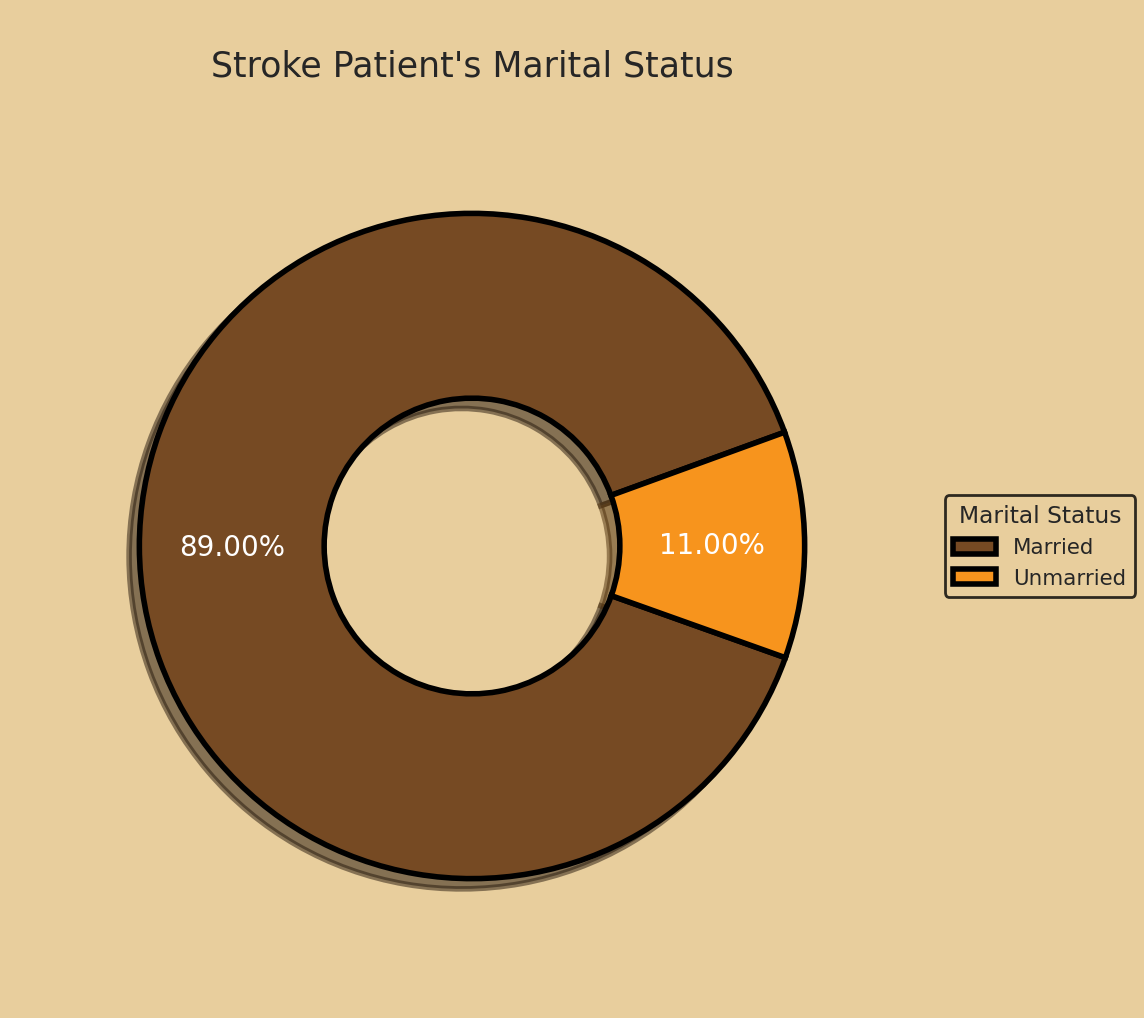

In [141]:
print(f"Let's have a look on the ratio of stroke patient's marital status :")
plt.subplots(figsize=(12, 12))

labels = "Married","Unmarried"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Marital Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Marital Status",fontsize=25)
plt.show()

Let's have a look on the stroke patient's marital status :


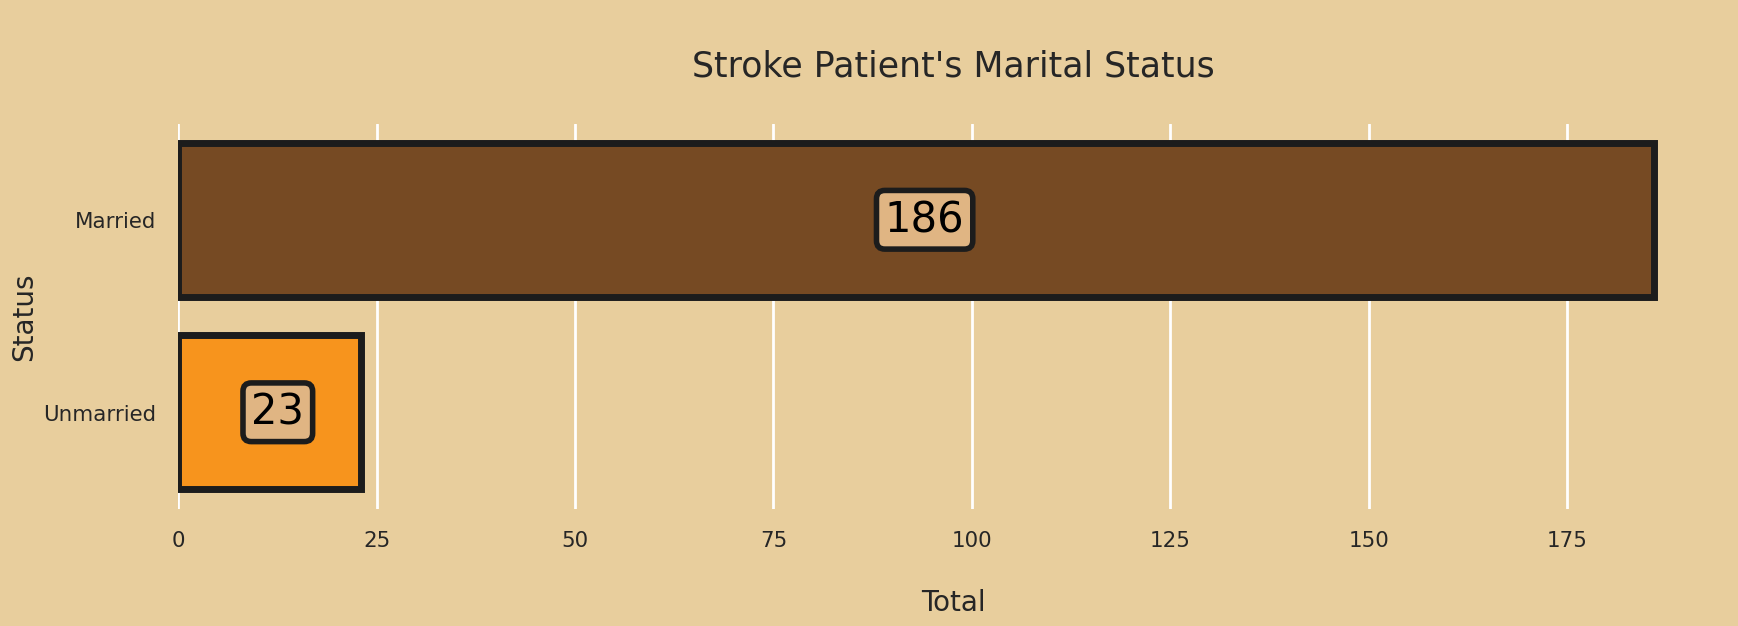

In [142]:
print("Let's have a look on the stroke patient's marital status :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Marital Status"],order=data[data["Stroke"]=="Yes"]["Marital Status"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Marital Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients are **Married** with a ratio of **89.00%** followed by **Unmarried** with a ratio of **11.00%**

<a id="11"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's BMI</p>

Let's have a look on the distribution of stroke patient's BMI :


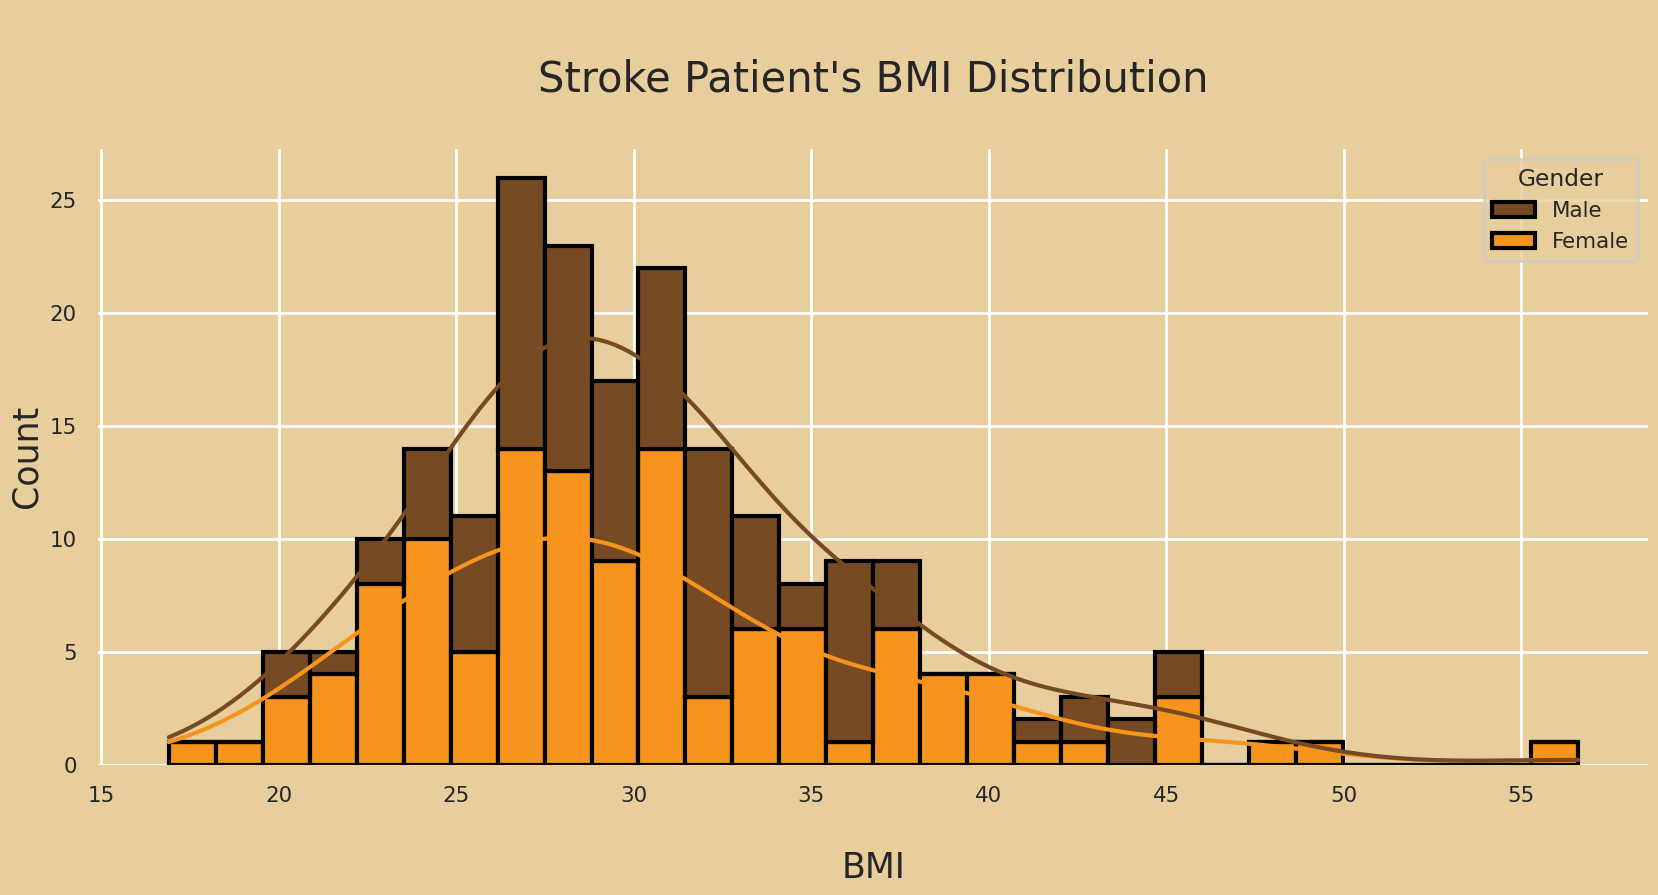

In [143]:
print(f"Let's have a look on the distribution of stroke patient's BMI :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="BMI",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's BMI Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nBMI",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see the stroke patient's BMI distribution is right skewed. Most of the patient's BMI  fall in between **25** to **35**.
* Also there are some high BMI values too.

Let's have a look on the distribution of genderwise stroke patient's BMI :


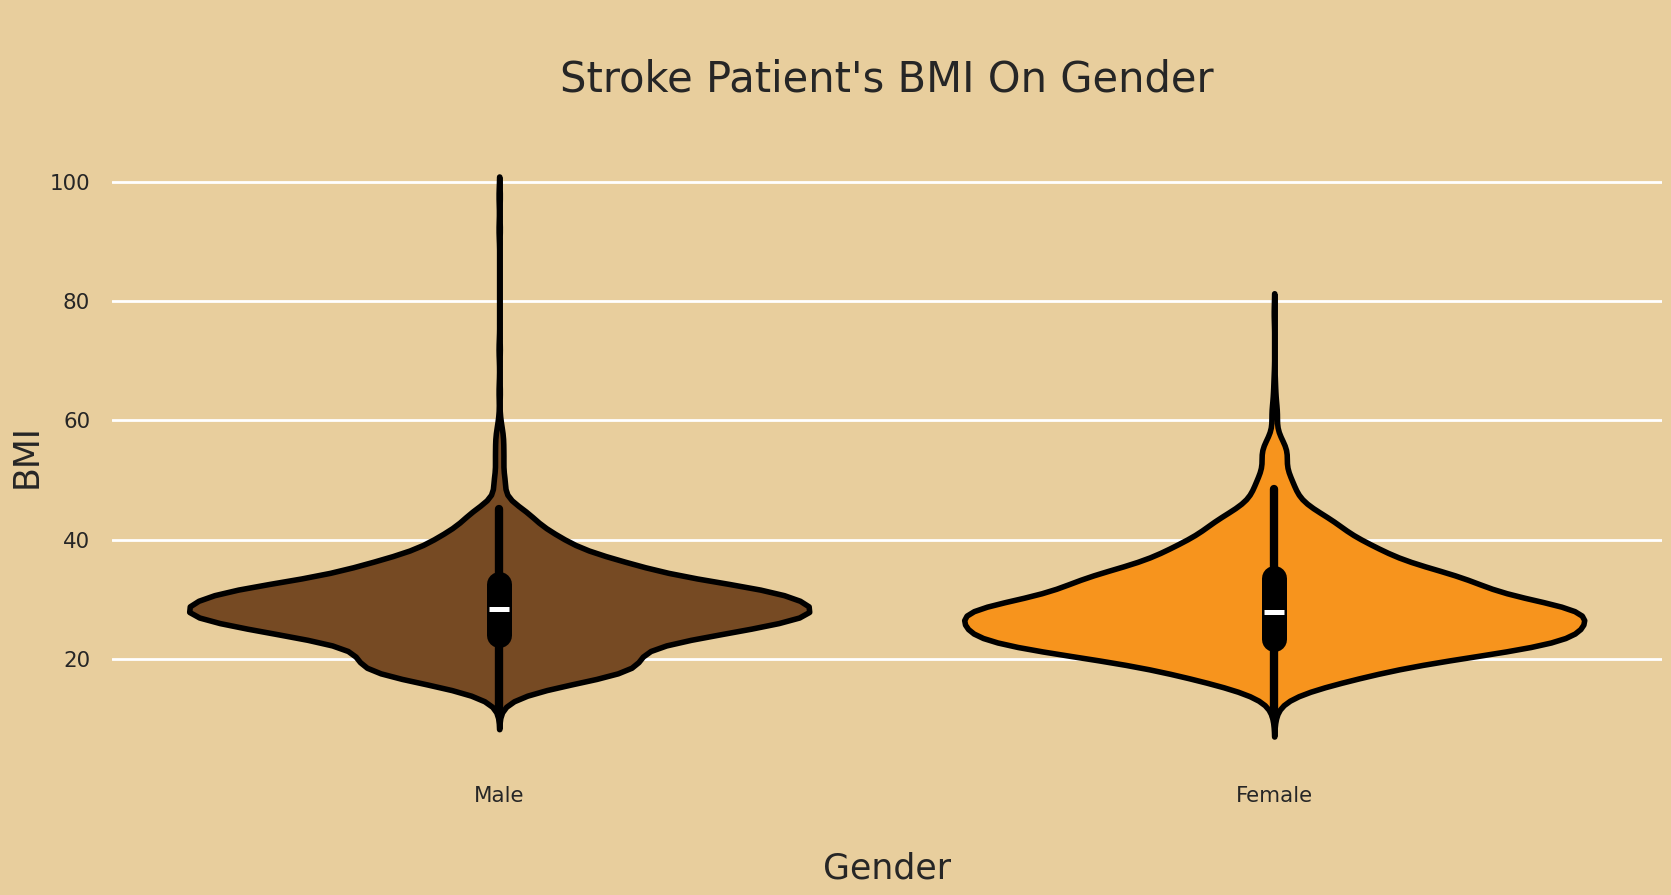

In [144]:
print("Let's have a look on the distribution of genderwise stroke patient's BMI :")
plt.subplots(figsize=(20, 8))

p=sns.violinplot(data=data[data["Stroke"] == "Yes"],x=data["Gender"],y=data["BMI"],order=data["Gender"].value_counts(ascending=True).index,palette=palette[0:2],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nStroke Patient's BMI On Gender\n",fontsize=30)
p.axes.set_xlabel("\nGender",fontsize=25)
p.axes.set_ylabel("BMI",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the **Male** patient's BMI fall in between **25** to **35**
* Most of the **Female** patient's BMI fall in between **23** to **31**

<a id="12"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Heart Disease</p>

Let's have a look on the ratio of stroke patient's heart disease :


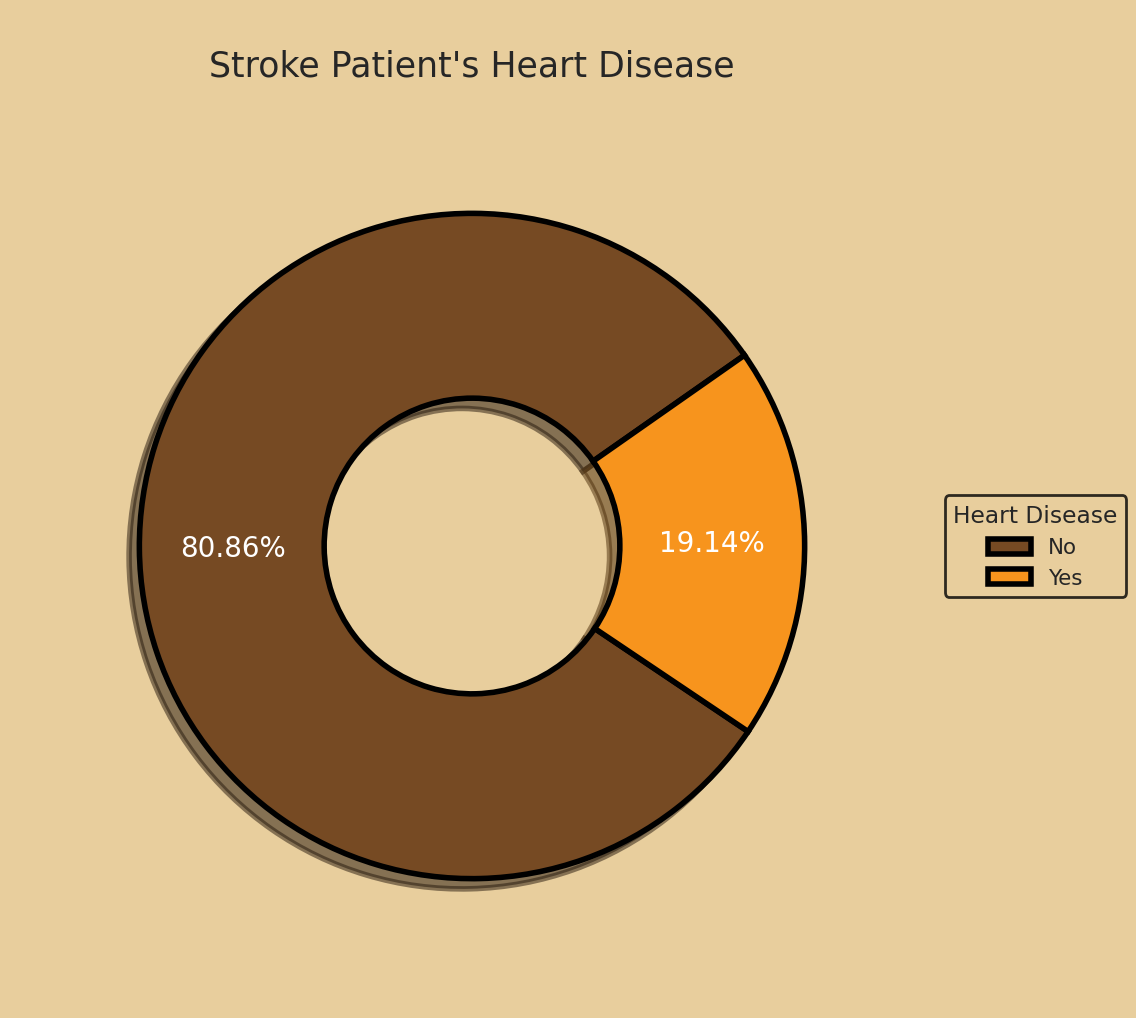

In [145]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(12, 12))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 35)

plt.legend(wedges, labels, title="Heart Disease",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Heart Disease",fontsize=25)
plt.show()

Let's have a look on the stroke patient's heart disease :


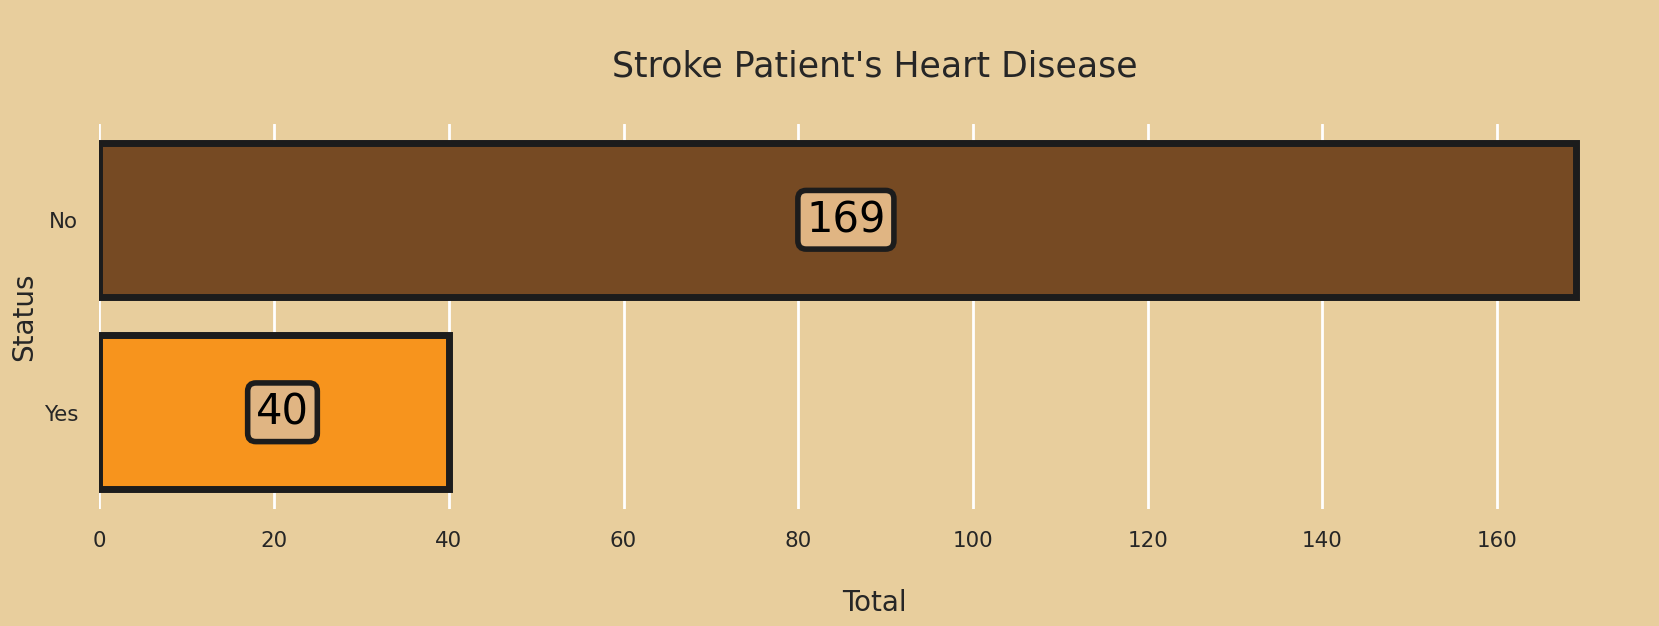

In [146]:
print("Let's have a look on the stroke patient's heart disease :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Heart Disease"],order=data[data["Stroke"]=="Yes"]["Heart Disease"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Heart Disease\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients do not have heart disease. Only **19.14%** patients have heart disease

<a id="13"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Hypertension Status</p>

Let's have a look on the ratio of stroke patient's heart disease :


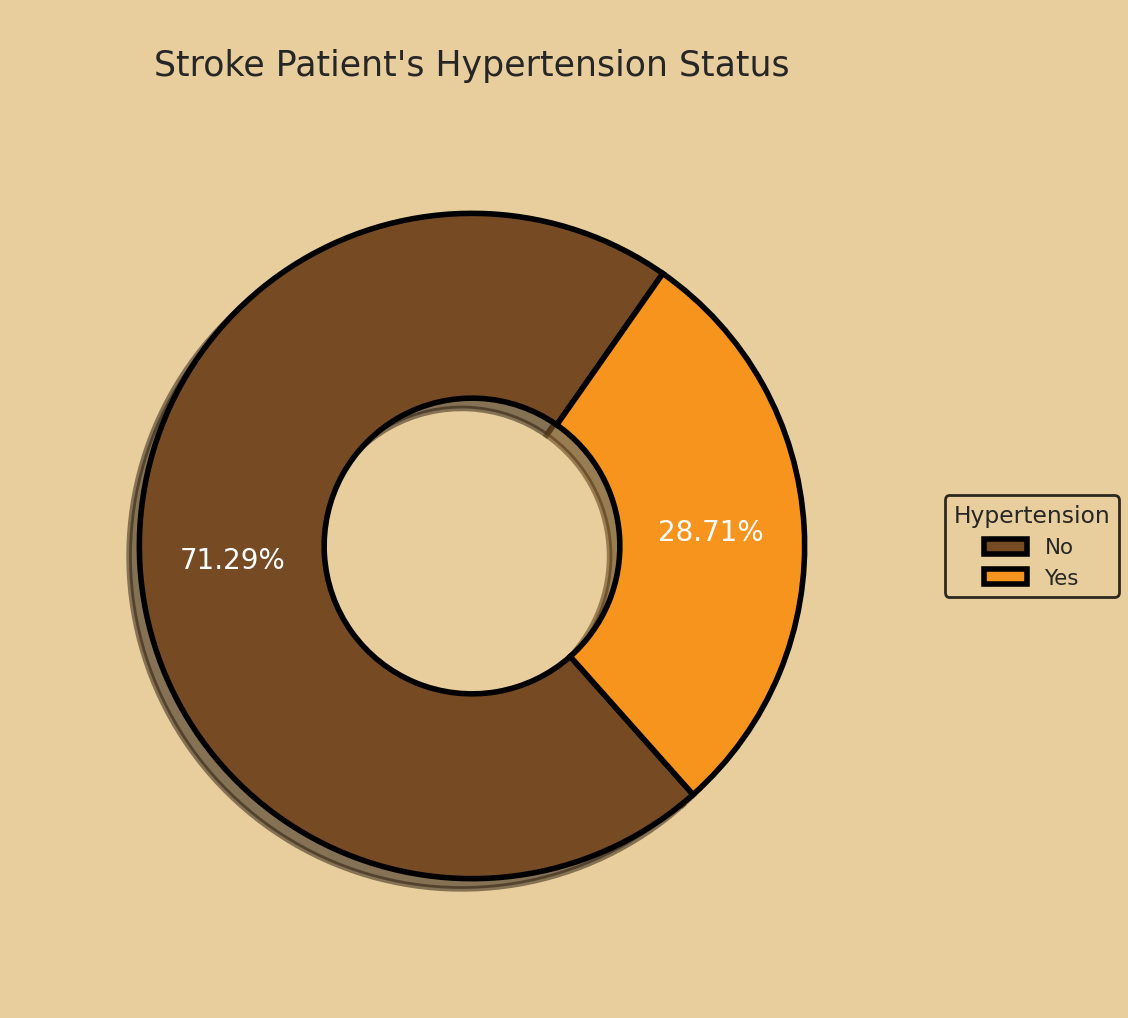

In [147]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(12, 12))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 55)

plt.legend(wedges, labels, title="Hypertension",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Hypertension Status",fontsize=25)
plt.show()

Let's have a look on the stroke patient's hypertension status :


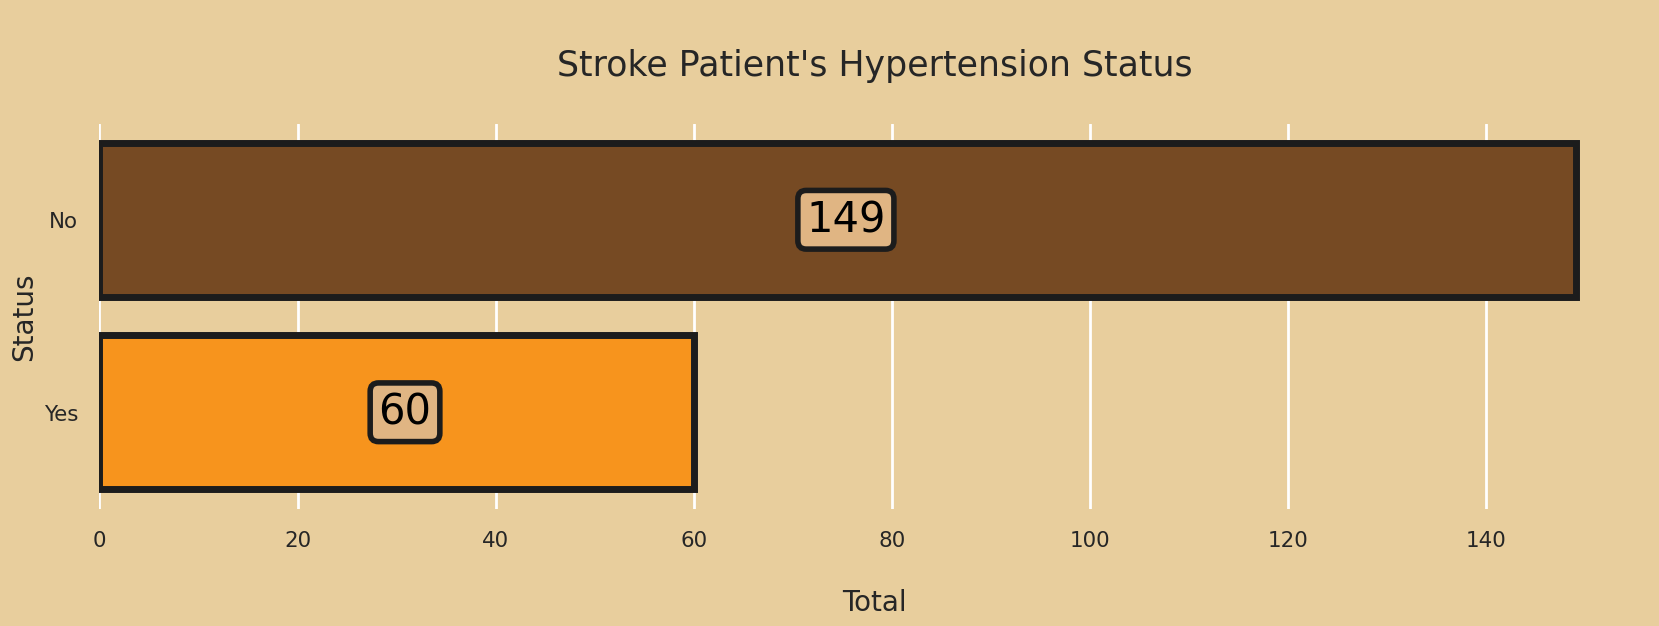

In [148]:
print("Let's have a look on the stroke patient's hypertension status :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Hypertension"],order=data[data["Stroke"]=="Yes"]["Hypertension"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Hypertension Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients do not have hypertension. Only **28.71%** patients have hypertension

<a id="14"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Average Glucose Level</p>

Let's have a look on the distribution of stroke patient's average glucose level :


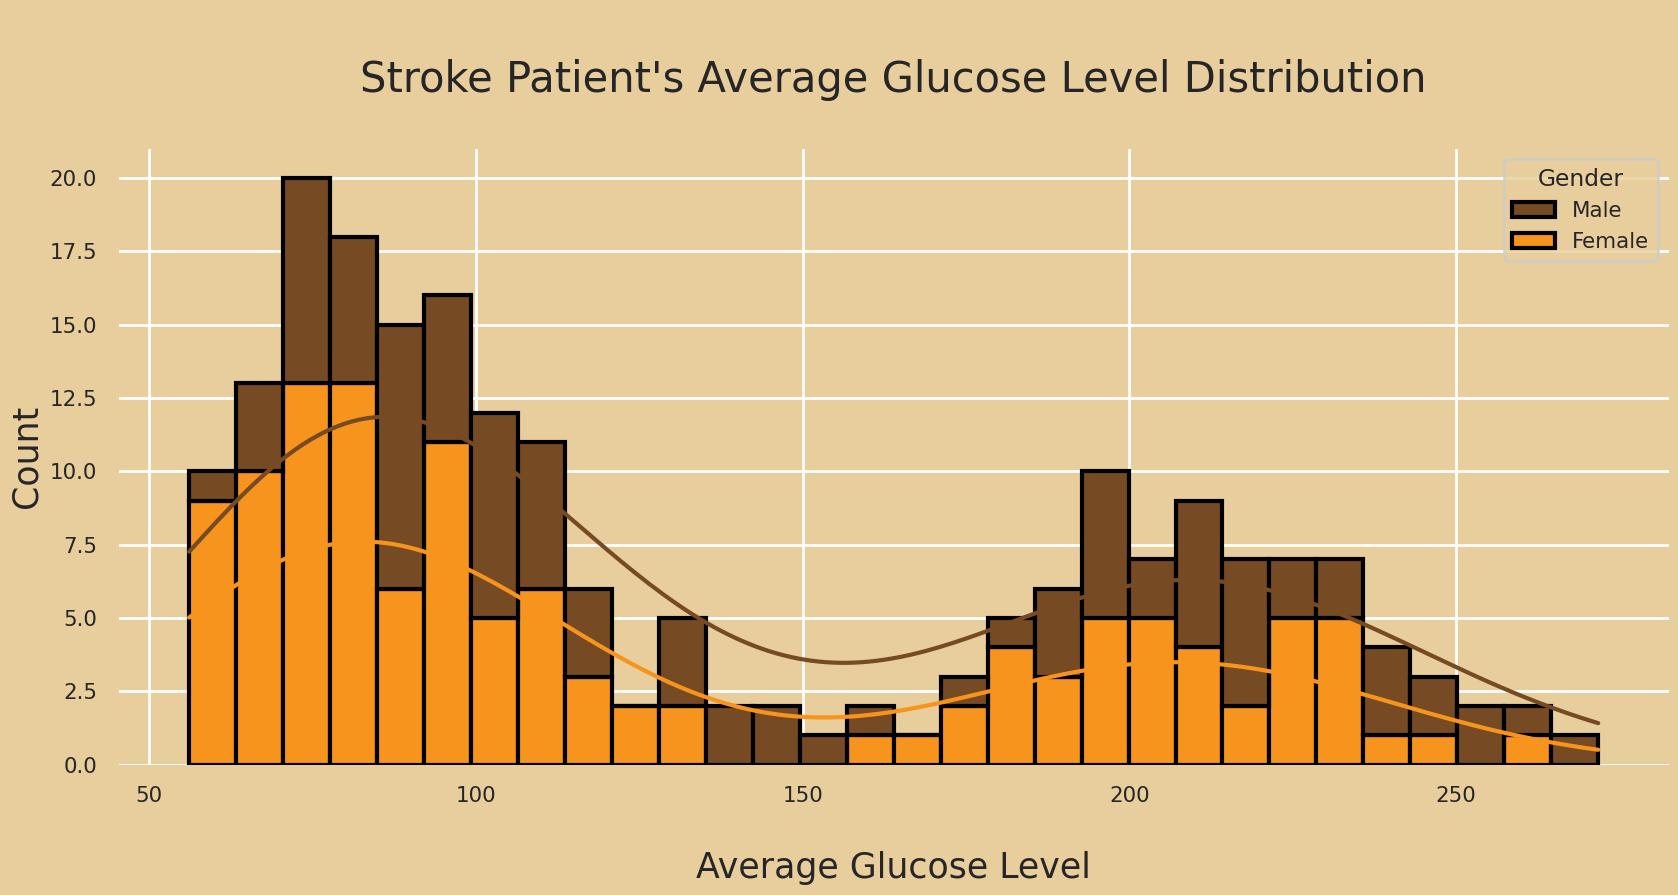

In [149]:
print(f"Let's have a look on the distribution of stroke patient's average glucose level :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"]=="Yes"],x="Average Glucose Level",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Average Glucose Level Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAverage Glucose Level",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see most of the patient's average glucose levels fall in between **60** to **120**
* Also there are some high average glucose levels too

Let's have a look on the distribution of genderwise stroke patient's Average Glucose Level :


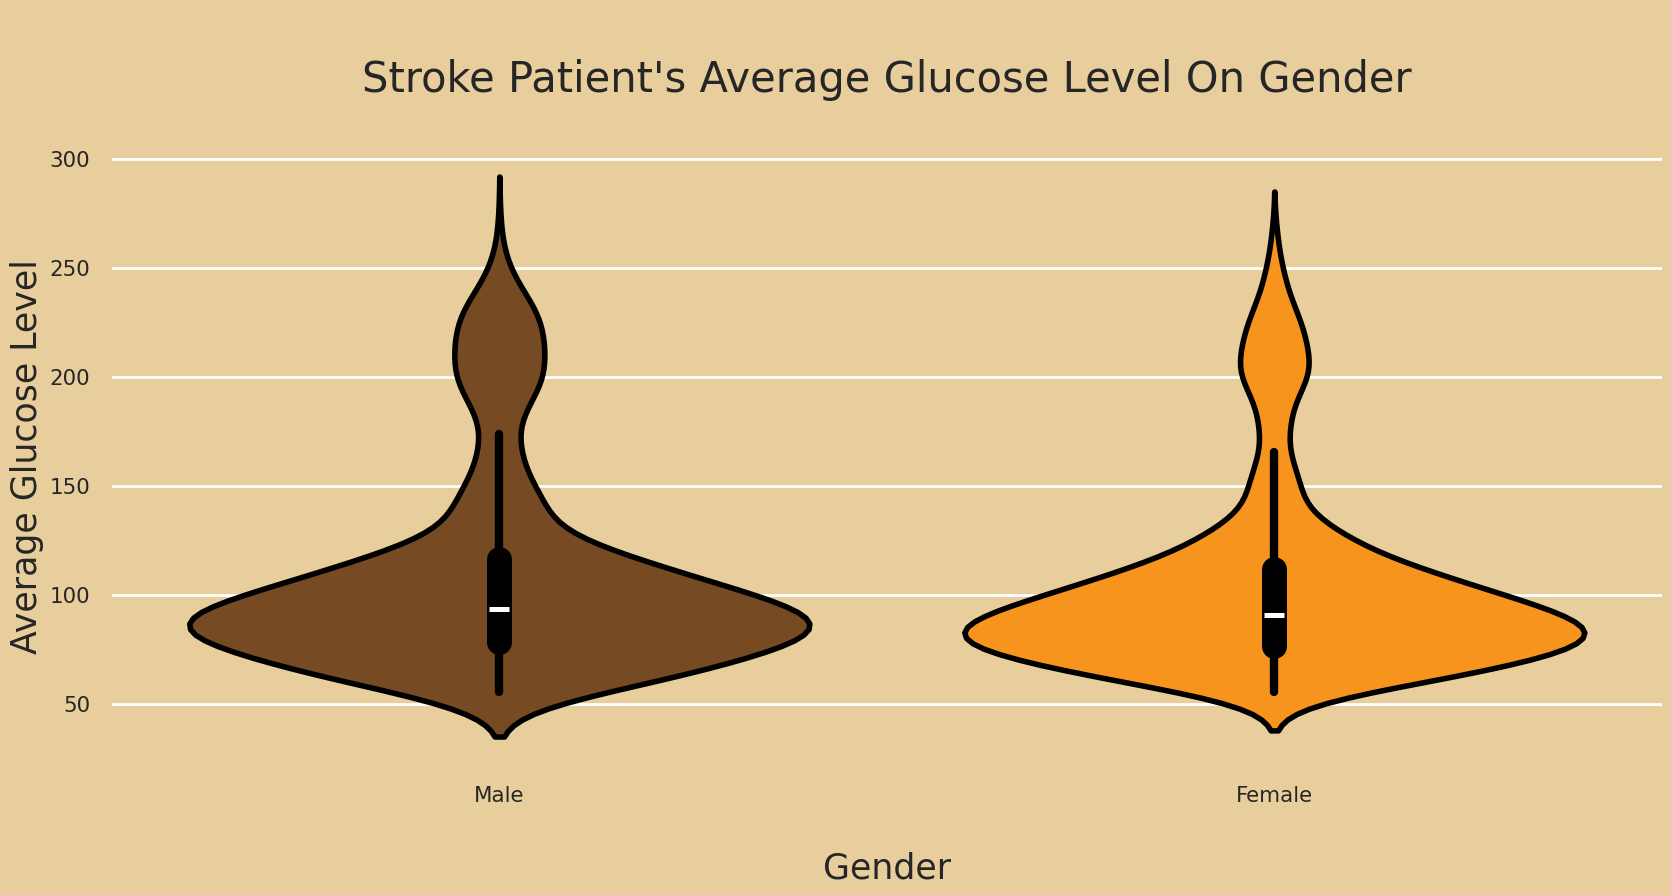

In [150]:
print("Let's have a look on the distribution of genderwise stroke patient's Average Glucose Level :")
plt.subplots(figsize=(20, 8))

p=sns.violinplot(data=data[data["Stroke"]=="Yes"],x=data["Gender"],y=data["Average Glucose Level"],order=data["Gender"].value_counts(ascending=True).index,palette=palette[0:2],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nStroke Patient's Average Glucose Level On Gender\n",fontsize=30)
p.axes.set_xlabel("\nGender",fontsize=25)
p.axes.set_ylabel("Average Glucose Level",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the **Male** patient's average glucose levels fall in between **70** to **120**
* Most of the **Female** patient's average glucose levels fall in between **55** to **115**

<a id="15"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Occupation</p>

Let's have a look on the ratio of stroke patient's occupation type :


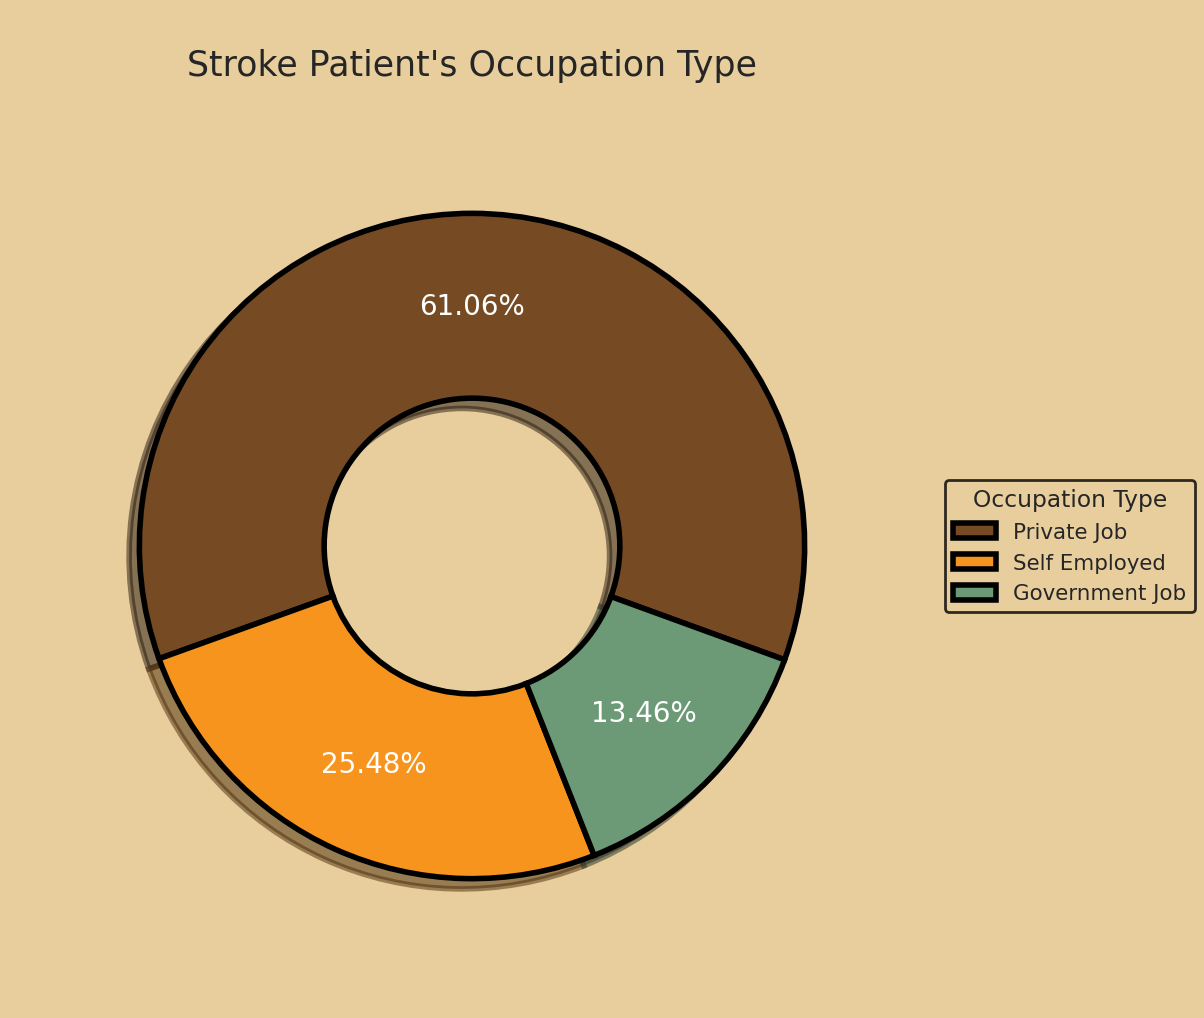

In [151]:
print(f"Let's have a look on the ratio of stroke patient's occupation type :")
plt.subplots(figsize=(12, 12))

labels = "Private Job","Self Employed","Government Job"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[1],
                                    data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:3], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -20)

plt.legend(wedges, labels, title="Occupation Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Occupation Type",fontsize=25)
plt.show()

Let's have a look on the stroke patient's occupation type :


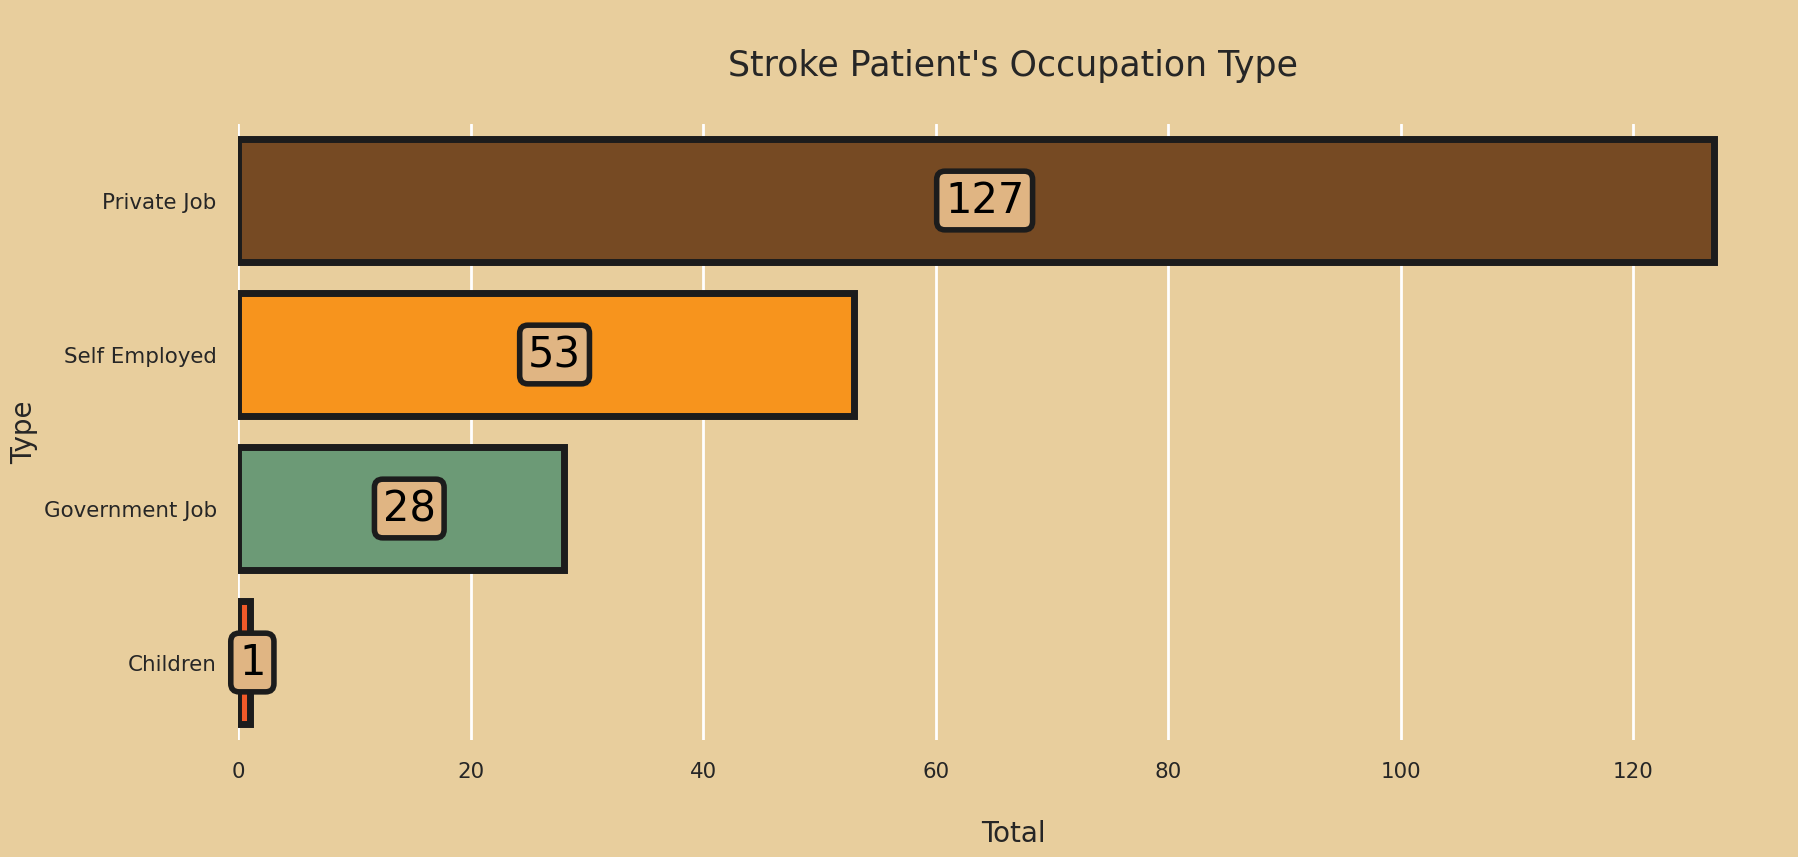

In [152]:
print("Let's have a look on the stroke patient's occupation type :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Occupation Type"],order=data[data["Stroke"]=="Yes"]["Occupation Type"].value_counts(ascending=False).index,palette=palette[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Occupation Type\n",fontsize=25)
p.axes.set_ylabel("Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the stroke patients have experience of **Private Job** with a ratio of **61.06%**
* Some of the stroke patients have experience of **Self Employment** with a ratio of **25.48%**
* Some of the stroke patients have experience of **Government Job** with a ratio of **13.46%**
* Only 1 patient is children that's why it was not included in the donut chart

<a id="16"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stroke Patient's Residence</p>

Let's have a look on the ratio of stroke patient's residence type :


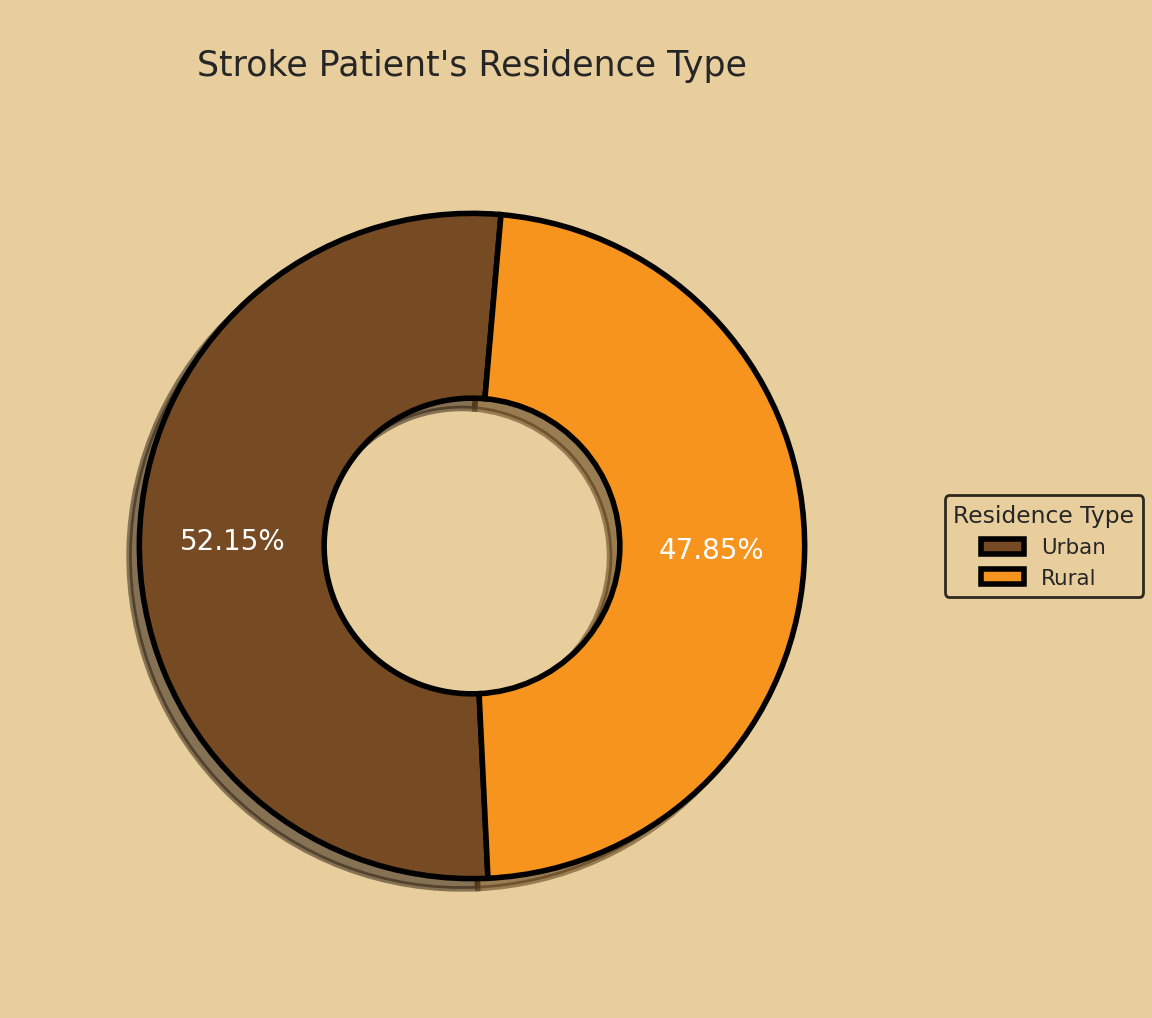

In [153]:
print(f"Let's have a look on the ratio of stroke patient's residence type :")
plt.subplots(figsize=(12, 12))

labels = "Urban","Rural"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Residence Type"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Residence Type"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 85)

plt.legend(wedges, labels, title="Residence Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Residence Type",fontsize=25)
plt.show()

Let's have a look on the stroke patient's residence type :


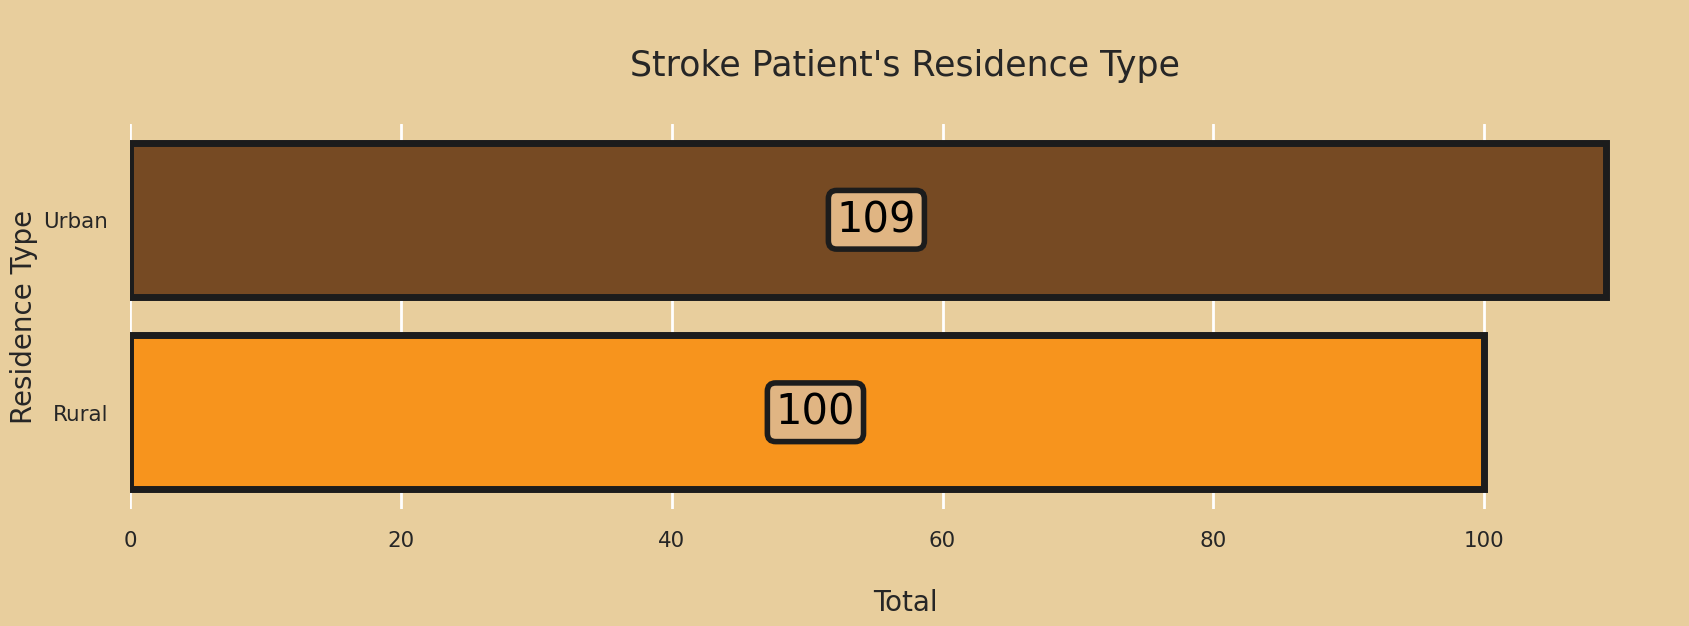

In [154]:
print("Let's have a look on the stroke patient's residence type :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Residence Type"],order=data[data["Stroke"]=="Yes"]["Residence Type"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Residence Type\n",fontsize=25)
p.axes.set_ylabel("Residence Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **52.15%** patients live in **Urban** area and **47.85%** patients live in **Rural** area

<a id="17"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

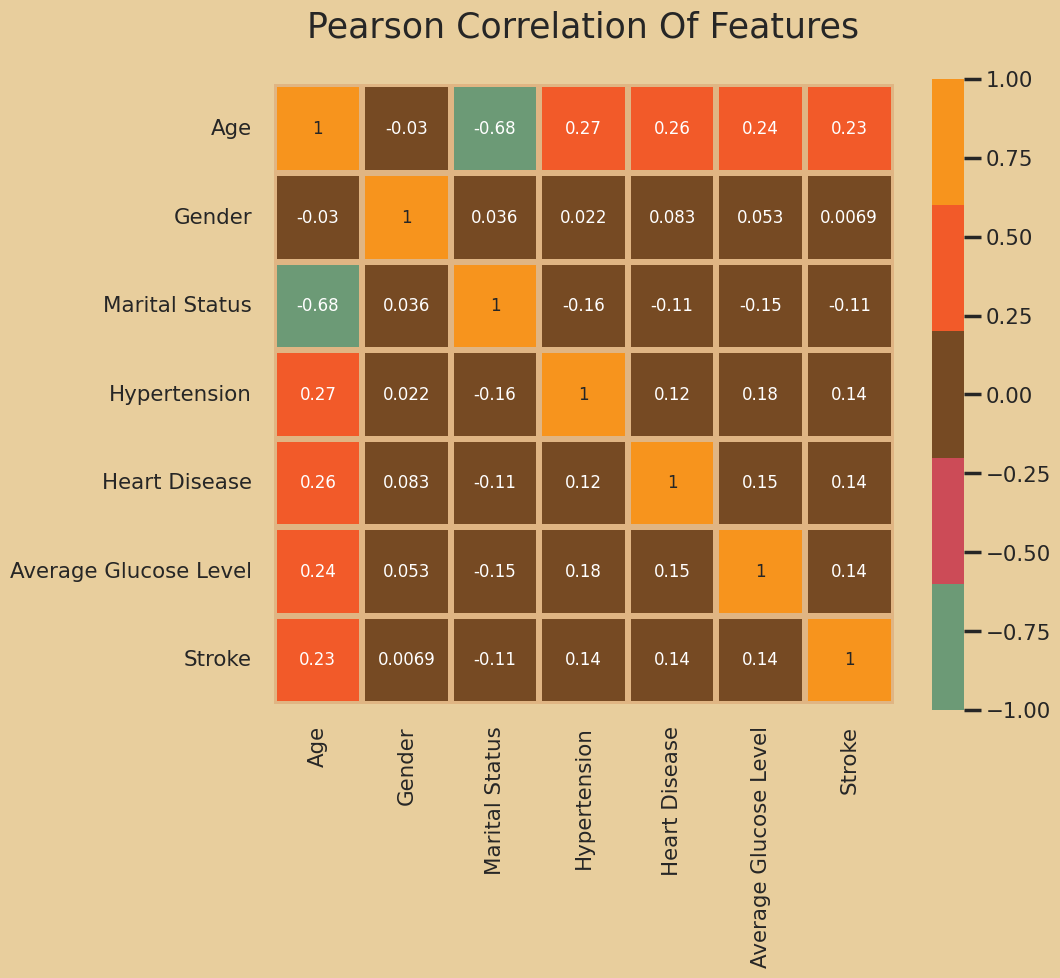

In [155]:
data = data.drop(columns=['Residence Type','BMI','Occupation Type','Smoking Status'])
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(10, 10))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Insights:**

* We can see there is not any high correlation between target feature and other features. Small positive correlation between target feature and **Age**, **Hypertension**, **Heart Disease**, **Average Glucose Level**. 
* Small positive correlation between **Age** and **Stroke**, **Hypertension**, **Heart Disease**, **Average Glucose Level**, **BMI**.
* Small positive correlation between **Smoking Status** and **Marital Status**, **Occupation Type** and **BMI**.
* Medium positive correlation between **Age** and **Occupation Type**.
* Medium negative correlation between **Age** and **Marital Status**.

<a id="18"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation & Performance Evaluation</p>

After performing standardization, we have splitted the dataset with a ratio of 0.2 that means 80% data for training and 20% data for validation process.

In [156]:
x = data.drop(["Stroke"],axis =1)
y = data["Stroke"]
# Average Glucose Level BMI','Occupation Type Smoking Status
sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (3926, 6), (3926,)
Shape of testing data : (982, 6), (982,)


In [160]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[837  92]
 [ 31  22]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       929
           1       0.19      0.42      0.26        53

    accuracy                           0.87       982
   macro avg       0.58      0.66      0.60       982
weighted avg       0.92      0.87      0.90       982


The Accuracy of Gaussian Naive Bayes is 87.47 %
